In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pandas as pd

pd.set_option("display.max_columns", None)


import matplotlib
matplotlib.use('Agg')  # Use Agg backend if full matplotlib is imported

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported

get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

RANDOM_SEED = 42

# Set default style for seaborn
sns.set(style='whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Loading
data_path = '/content/drive/MyDrive/Colab Notebooks/india_ckd.csv'
df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

print('Dataset loaded successfully.')
print('Shape:', df.shape)

Dataset loaded successfully.
Shape: (1100, 26)


## **3. Missing Value replace with mean and mode (Lakwan)**





In [ ]:
new_df=df.copy()

In [ ]:
# Identify numerical and categorical columns
numerical_cols = new_df.select_dtypes(include=np.number).columns
categorical_cols = new_df.select_dtypes(include='object').columns

# Fill missing values in numerical columns with the mean
for col in numerical_cols:
    new_df[col] = new_df[col].fillna(new_df[col].mean())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    new_df[col] = new_df[col].fillna(new_df[col].mode()[0])

print("Missing values filled successfully.")

Missing values filled successfully.


In [ ]:
new_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,102,17.0,60.0,1.010000,0.000000,0.000000,normal,normal,notpresent,notpresent,92.0,32.0,2.1,141.0,4.2,13.9,52,7000,5.2,no,no,no,good,no,no,ckd
1,348,38.0,80.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,99.0,19.0,0.5,147.0,3.5,13.6,44,7300,6.4,no,no,no,good,no,no,notckd
2,270,23.0,80.0,1.025000,0.000000,0.000000,normal,normal,notpresent,notpresent,111.0,34.0,1.1,145.0,4.0,14.3,41,7200,5.0,no,no,no,good,no,no,notckd
3,106,50.0,90.0,1.017397,1.009212,0.426943,normal,normal,notpresent,notpresent,89.0,118.0,6.1,127.0,4.4,6.0,17,6500,5.2,yes,yes,no,good,yes,yes,ckd
4,71,46.0,60.0,1.010000,1.000000,0.000000,normal,normal,notpresent,notpresent,163.0,92.0,3.3,141.0,4.0,9.8,28,14600,3.2,yes,yes,no,good,no,no,ckd


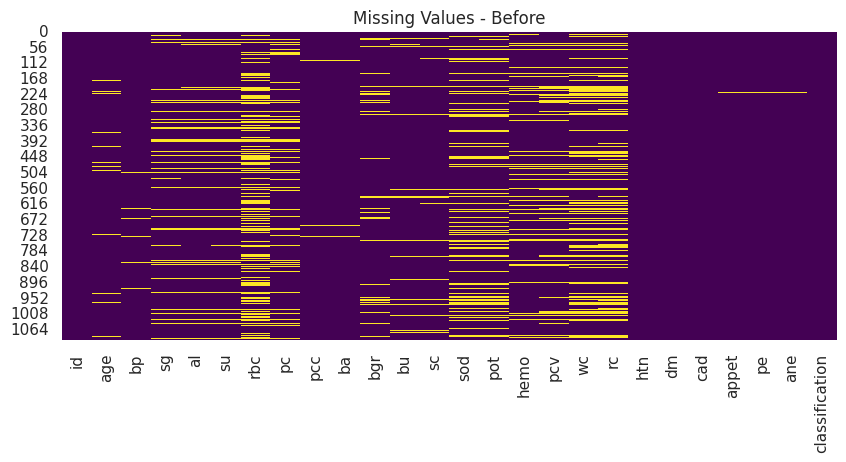

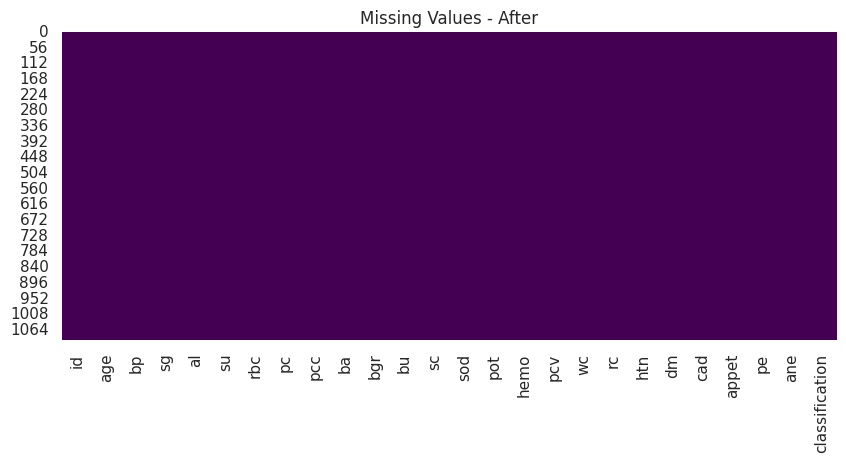

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - Before")
plt.show()

# After
plt.figure(figsize=(10,4))
sns.heatmap(new_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - After")
plt.show()


In [ ]:
print("Missing values per column after filling:")
print(new_df.isnull().sum())

Missing values per column after filling:
id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
